This code is used to generate an Excel formula to check whether ANY pair of column and value provided (in the form of a string note) exist or not in a row of a survey data.

In this example, the string note is "Q1_4, Q2_5, Q3_6, Q4_7, Q5_3,     Q6_2, Q7_6, Q8_7, Q9_3,   Q10_5, B1_5, Q16_5".
The assignment is to detect the whether any of these condition happens: value 4 appears in Q1, 5 appears in Q2, 6 appear in Q3...

In [16]:
# LIBRARY
import pandas as pd 
import numpy as np
import re

In [17]:
# INPUT
string_note = r"Q1_4, Q2_5, Q3_6, Q4_7, Q5_3,     Q6_2, Q7_6, Q8_7, Q9_3,   Q10_5, B1_5, Q16_5"
data = pd.read_excel(r'/Users/giangtrongnguyen/Python/Portfolio/Check_value_in_row_formula/Data file.xlsx', sheet_name="data")

Q1 - Q10 are single-choice questions, their values vary

In [18]:
data.loc[:20, 'Q1':'Q10']

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,4,2,1,1,3,3,5,1,5,2
1,1,2,1,5,3,6,3,4,4,5
2,4,6,5,5,5,3,5,6,3,4
3,3,1,1,2,2,3,2,6,4,5
4,4,2,4,1,4,5,2,6,5,7
5,4,5,2,4,6,3,4,2,5,7
6,5,1,7,4,6,4,1,3,1,5
7,1,3,2,2,5,6,1,3,5,5
8,4,5,3,5,1,1,2,6,1,1
9,4,4,1,5,1,5,3,3,4,4


B1s are battery questions. There values are from 1 to 5

In [19]:
data.loc[:20, 'B1Q11':'B1Q15']

,B1Q11,B1Q12,B1Q13,B1Q14,B1Q15
0,3,3,4,1,1
1,3,2,2,2,2
2,1,1,1,2,1
3,2,4,1,4,3
4,2,3,2,1,3
5,2,2,2,4,2
6,1,4,1,2,3
7,2,4,4,3,1
8,3,4,4,1,1
9,4,4,3,2,1


Q16 is a multiple-choice question with 5 options, each options is represented by one column with 1 means "selected" and 0 means "not selected"

In [20]:
data.loc[:20, 'Q16_1':'Q16_5']

,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5
0,0,0,1,0,1
1,0,1,0,0,0
2,1,0,1,1,0
3,1,0,1,0,1
4,0,1,0,0,1
5,1,0,1,1,0
6,1,0,0,1,0
7,1,1,1,0,0
8,1,0,0,0,0
9,0,1,1,1,0


In [21]:
# CLEANING
# Removing the unwanted characters and/or replace with desired ones
string_note = string_note.replace('\\','')
string_note = string_note.replace('answer option','_')
string_note = string_note.replace('/',',')
string_note = string_note.replace(' ','')
string_note

'Q1_4,Q2_5,Q3_6,Q4_7,Q5_3,Q6_2,Q7_6,Q8_7,Q9_3,Q10_5,B1_5,Q16_5'

In [22]:
# CREATING FUNCTION
# This function converts a zero-based index to its corresponding Excel column name.
def index_to_excel_column(n):
    result = ''
    while n >= 0:
        result = chr(n % 26 + ord('A')) + result
        n = n // 26 - 1
    return result.upper()

In [23]:
# CREATE COLUMNS FOR PROCESSING
df = pd.DataFrame(string_note.split(','), columns=['Raw'])

df['Column'] = np.nan
df['Code'] = np.nan
df['Excel_Column'] = np.nan

df['Column'] = df['Column'].astype("object")
df['Code'] = df['Code'].astype("object")
df['Excel_Column'] = df['Excel_Column'].astype("object")
df

,Raw,Column,Code,Excel_Column
0,Q1_4,NaN,NaN,NaN
1,Q2_5,NaN,NaN,NaN
2,Q3_6,NaN,NaN,NaN
3,Q4_7,NaN,NaN,NaN
4,Q5_3,NaN,NaN,NaN
5,Q6_2,NaN,NaN,NaN
6,Q7_6,NaN,NaN,NaN
7,Q8_7,NaN,NaN,NaN
8,Q9_3,NaN,NaN,NaN
9,Q10_5,NaN,NaN,NaN


In [24]:
# VALIDATE INPUT STRING
# Check if each entry matches the required format

invalid_entries = []
for i in df['Raw']:
    if not re.match(r'^[A-Za-z][A-Za-z0-9]*_[0-9]+$', i):
        invalid_entries.append(i)

if invalid_entries:
    print(f"⚠️  The following entry(s) are invalid, please adjust to the format [Column/Battery]_[(Only 1) Punch]:")
    for i in invalid_entries:
        print(f" - {i}")
        raise SystemExit("❌ Program stopped due to validation errors. Please check your input in this code\n")

In [25]:
# CREATE COLUMNS
# MCQ column remain the same in the "Column" column - their value become 1, battery columns are converted to range of columns, SCQ column remain the same 
for i in range(len(df)):
    if df.loc[i, 'Raw'] in data.columns:
        df.loc[i, 'Column'] = df.loc[i, 'Raw']
        df.loc[i, 'Code'] = 1
    elif df.loc[i, 'Raw'].startswith('B'):
        a = df.loc[i, 'Raw'].split('_')[0]
        b = []
        for j in range(len(data.columns)):
            if data.columns[j].startswith(a):
                b.append(data.columns[j])
        df.loc[i, 'Column'] = b[0] + '-' + b[-1]
        df.loc[i, 'Code'] = df.loc[i, 'Raw'].split('_')[1]
    else:
        df.loc[i, 'Column'] = df.loc[i, 'Raw'].split('_')[0]
        df.loc[i, 'Code'] = df.loc[i, 'Raw'].split('_')[1]
df        

,Raw,Column,Code,Excel_Column
0,Q1_4,Q1,4,NaN
1,Q2_5,Q2,5,NaN
2,Q3_6,Q3,6,NaN
3,Q4_7,Q4,7,NaN
4,Q5_3,Q5,3,NaN
5,Q6_2,Q6,2,NaN
6,Q7_6,Q7,6,NaN
7,Q8_7,Q8,7,NaN
8,Q9_3,Q9,3,NaN
9,Q10_5,Q10,5,NaN


In [26]:
# VALIDATE INPUT COLUMNS
# Check if each column exists in the data file
list_of_columns = []
for i in df['Column']:
    for j in i.split('-'):
        list_of_columns.append(j.strip())

invalid_columns = []
for i in list_of_columns:
    if i not in data.columns:
        invalid_columns.append(i)

if invalid_columns:
    print(f"⚠️  The following column(s) are invalid, please make sure the input columns exist in the data file:")
    for i in invalid_columns:
        print(f" - {i}")
        raise SystemExit("❌ Program stopped due to validation errors. Please check your input in this code\n")


In [27]:
# CREATE COLUMNS
# Use the function to convert column names to Excel column letters and create the core of Excel formula for each entry
for i in range(len(df)):
    a = df.loc[i, 'Column'].split('-')
    b = []
    for j in a:
        b.append(f"{index_to_excel_column(data.columns.get_loc(j))}2")
    df.loc[i, 'Excel_Column'] = ':'.join(b)

df['Formula'] = df['Excel_Column'].astype(str) + "=" + df['Code'].astype(str)
df

,Raw,Column,Code,Excel_Column,Formula
0,Q1_4,Q1,4,A2,A2=4
1,Q2_5,Q2,5,B2,B2=5
2,Q3_6,Q3,6,C2,C2=6
3,Q4_7,Q4,7,D2,D2=7
4,Q5_3,Q5,3,E2,E2=3
5,Q6_2,Q6,2,F2,F2=2
6,Q7_6,Q7,6,G2,G2=6
7,Q8_7,Q8,7,H2,H2=7
8,Q9_3,Q9,3,I2,I2=3
9,Q10_5,Q10,5,J2,J2=5


In [28]:
# CREATE FINAL FORMULA
# Compete the formula of each entry
for i in range(len(df)):
    if df.loc[i, 'Excel_Column'].__contains__(':'):
        df.loc[i, 'Formula'] = f"COUNTIFS({df.loc[i, 'Excel_Column']},{df.loc[i, 'Code']})>0"
    else:
        df.loc[i, 'Formula'] = f"{df.loc[i, 'Excel_Column']}={df.loc[i, 'Code']}"    

# Combine the formula of each entry into one final formula
core = ','.join(list(df['Formula']))
formula = f'=IF(OR({core}), "TRUE", "FALSE")'

In [29]:
# OUTPUT
print()
print('✅ Here is your formula:')
print(formula)
print()


✅ Here is your formula:
=IF(OR(A2=4,B2=5,C2=6,D2=7,E2=3,F2=2,G2=6,H2=7,I2=3,J2=5,COUNTIFS(K2:O2,5)>0,T2=1), "TRUE", "FALSE")



Paste this formula to the row 2 of the CHECK column (and the end of the data)

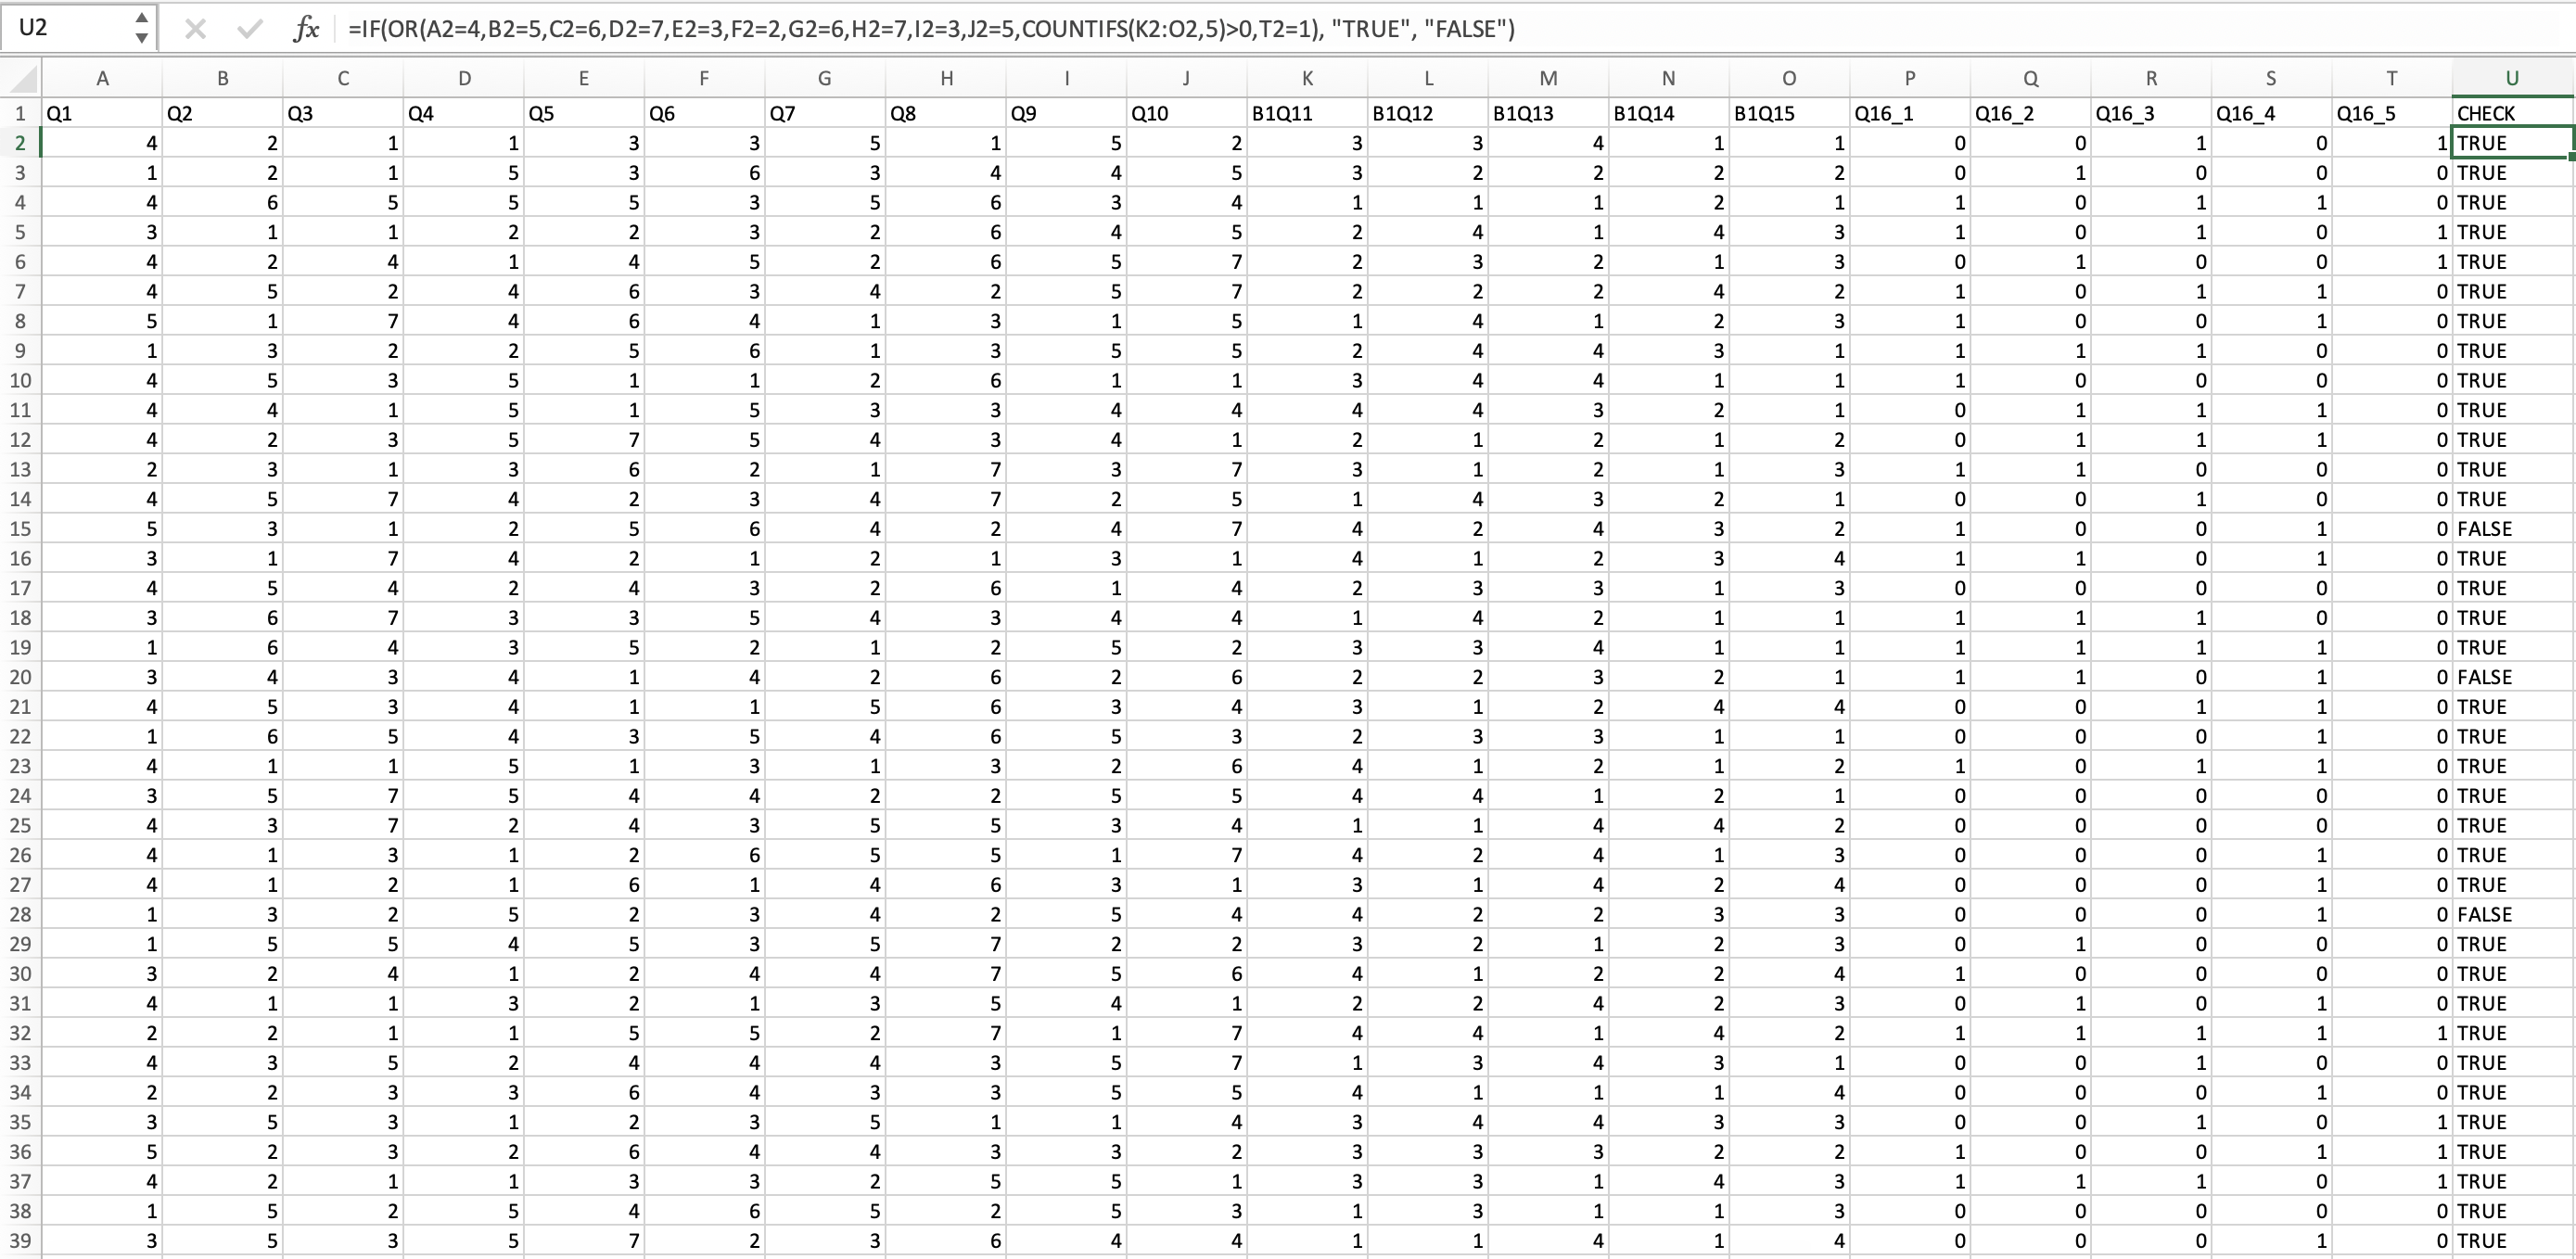